<a href="https://colab.research.google.com/github/FKoeppe/sdsphd20_portfolio_fk/blob/main/Frederik_Koeppe_Homework_Tuesday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
import numpy as np
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

Well, i guess 0 ist agree alot and 4 is disagree a lot.

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
#Import data
df=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv")

In [ ]:
df.head()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald
0,2,1,1,1,1,1,1,2,2,4,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,1,1,2,1,1,1,1,2,2,2,...,3,1,3,2,2,1,.,1,2,2,1,1,1,3,2,1,2,1,1,1,2,1,2,2,2,2,3,2,3,3,3,2,2,1,4,4,3,2,2,48
1,1,1,2,0,1,1,2,2,1,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,...,3,1,2,2,3,1,1,1,1,1,1,2,1,3,2,1,2,1,1,1,2,2,1,2,2,1,1,2,3,3,1,1,2,2,2,1,2,2,1,30
2,1,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,...,3,2,3,2,3,1,3,2,2,3,1,3,2,3,2,1,2,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,1,1,57
3,2,1,1,1,.,1,1,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,...,3,1,3,2,3,1,1,1,2,2,1,2,2,3,1,1,2,1,2,1,2,1,2,2,2,3,3,2,4,3,2,3,2,2,4,3,3,3,2,55
4,1,1,2,0,1,1,2,1,3,3,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,.,...,.,1,.,.,.,1,1,2,.,3,1,3,.,.,1,1,2,2,2,1,2,2,2,2,2,.,4,3,3,3,3,4,4,4,4,3,3,2,4,27


There are '.' values in the table, which i first change into NaN values.

In [ ]:
df_dropped=df.replace('.', np.nan)

Then i drop those rows first. If this would be an ongoing task, someone could better look into specific questions which has a lot of empty values and exclude those questions, to keep the overall amount of valid rows high. When exluding all rows with NaN i only have around 300 rows left.

In [ ]:
df_droppedna = df_dropped.dropna(inplace=False)

In [ ]:
df_droppedna.reset_index(drop=True)

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald
0,1,1,2,0,1,1,2,2,1,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,...,3,1,2,2,3,1,1,1,1,1,1,2,1,3,2,1,2,1,1,1,2,2,1,2,2,1,1,2,3,3,1,1,2,2,2,1,2,2,1,30
1,1,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,...,3,2,3,2,3,1,3,2,2,3,1,3,2,3,2,1,2,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,1,1,57
2,1,1,2,0,1,1,2,1,3,4,1,1,1,1,1,2,1,1,1,2,1,1,1,2,1,2,1,2,2,2,2,1,2,1,2,1,1,2,2,2,...,3,1,3,2,3,1,1,2,1,3,1,2,3,3,2,1,2,1,2,1,2,1,2,1,2,3,3,3,3,4,2,2,3,3,4,2,2,2,3,32
3,1,1,1,1,1,1,1,2,2,3,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,1,1,1,1,2,2,2,...,2,2,3,2,3,2,1,2,2,2,2,2,2,3,1,1,2,1,2,1,2,2,2,1,2,3,3,2,2,2,2,2,2,2,3,2,2,2,2,58
4,1,1,2,0,1,2,2,3,1,4,2,2,2,2,2,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,1,1,2,2,1,2,1,2,2,2,...,3,1,3,2,2,1,1,1,2,3,1,2,2,3,1,1,2,1,2,1,2,2,2,1,2,2,3,3,3,2,2,2,2,2,4,3,2,2,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2,1,2,0,2,1,1,2,2,3,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,1,1,2,1,2,2,1,...,2,1,2,2,3,1,1,1,2,3,1,2,2,2,1,1,2,2,1,1,2,1,2,2,2,2,1,4,3,4,1,2,3,2,2,1,1,2,1,24
297,1,1,1,2,2,2,2,1,4,4,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,1,1,1,1,1,2,2,2,...,2,1,3,2,3,1,1,1,1,2,2,1,1,3,1,2,1,2,1,2,2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,3,3,3,40
298,2,1,1,3,2,2,2,2,3,3,2,2,2,1,2,1,2,2,2,1,2,2,2,1,1,2,1,2,2,2,2,2,1,1,1,2,1,1,2,1,...,3,1,3,3,3,1,1,2,1,3,1,2,2,3,1,1,2,1,1,1,2,2,2,2,2,1,2,3,3,2,2,3,3,3,4,3,3,3,2,40
299,1,1,1,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,1,2,1,2,2,1,2,2,1,1,2,2,2,1,2,1,...,3,1,3,2,3,1,2,1,1,1,2,2,1,2,2,1,2,1,2,1,2,1,2,1,2,2,2,2,3,2,2,2,2,3,2,2,2,3,2,47


I only have around 300 rows left with people answered  all questions. 

In [ ]:
df_float.reset_index(drop=True)

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald,cluster,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19
0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,30.0,1,1,0,1,1,0,6,6,6,6,6,6,6,6,6,6,6,6,2
1,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,57.0,1,1,0,1,1,0,6,6,6,6,6,6,6,6,6,6,6,6,2
2,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,3.0,32.0,3,0,1,3,3,3,1,0,1,1,0,7,7,7,7,7,7,7,7
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,58.0,3,0,1,3,3,3,1,0,1,1,0,11,5,5,5,5,5,5,5
4,1.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,39.0,3,0,1,3,3,3,1,0,8,8,8,8,8,8,8,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,24.0,1,1,0,1,1,0,6,6,6,6,6,6,6,6,6,6,6,6,2
297,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,40.0,3,0,1,3,3,3,1,0,1,1,0,7,7,7,7,7,7,7,7
298,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,40.0,4,1,0,0,4,1,0,7,7,7,7,3,3,3,1,0,10,10,10
299,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,47.0,0,1,0,0,0,4,4,1,0,5,5,5,2,0,3,1,0,1,1


In [ ]:
df_float=df_droppedna.astype(float)

In [ ]:
df_float.describe()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald,cluster,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19
count,301.000000,301.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.408638,1.0,1.262458,1.813953,1.760797,1.112957,1.531561,1.607973,2.551495,3.009967,1.936877,1.916944,1.654485,1.744186,1.966777,1.877076,1.830565,1.900332,1.953488,1.395349,1.926910,1.980066,1.847176,1.465116,1.202658,1.857143,1.501661,1.820598,1.877076,1.637874,1.461794,1.754153,1.837209,1.531561,1.428571,1.488372,1.355482,1.465116,1.993355,1.345515,...,1.136213,1.926910,1.631229,1.923588,1.465116,1.873754,2.392027,2.342193,2.146179,2.740864,2.584718,1.843854,2.495017,2.431894,2.272425,2.930233,2.368771,2.265781,2.222591,2.069767,44.827243,1.757475,0.604651,0.531561,1.159468,1.757475,2.784053,2.554817,2.504983,3.149502,3.960133,4.372093,5.322259,4.295681,5.139535,5.554817,5.528239,6.252492,6.956811,6.940199
std,0.492401,0.0,0.440703,1.280080,0.771962,0.327411,0.613596,0.652536,0.792574,0.869809,0.243589,0.276427,0.476328,0.437044,0.179516,0.328896,0.375761,0.300055,0.210941,0.489740,0.260717,0.140005,0.360417,0.499612,0.402649,0.350510,0.500830,0.384328,0.328896,0.481415,0.499368,0.431305,0.369789,0.499834,0.495696,0.500697,0.479456,0.499612,0.081378,0.476328,...,0.343585,0.260717,0.483275,0.266099,0.499612,0.332679,0.756617,0.711229,0.609831,0.652655,0.737314,0.599058,0.723976,0.647698,0.652332,0.751742,0.787541,0.699375,0.658499,0.657102,14.093145,1.515801,0.489740,0.723303,1.283674,1.515801,1.560944,1.847833,2.428472,2.815595,2.816334,3.056319,3.236120,3.302870,4.123970,3.971711,4.611222,4.980900,5.114176,5.114986
min,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.

Averages per Age Group ('Bald')

In [ ]:
df_float.groupby(["bald"]).mean()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,cluster,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19
bald,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19.0,2.000000,1.0,2.000000,0.000000,2.000000,1.500000,1.500000,1.500000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.500000,1.000000,2.000000,1.500000,2.000000,2.000000,1.500000,1.500000,2.000000,2.000000,1.500000,1.500000,2.000000,1.500000,1.500000,2.000000,1.000000,...,1.500000,1.000000,2.000000,1.500000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.500000,2.000000,2.000000,2.000000,3.000000,2.500000,2.500000,1.500000,2.000000,1.500000,0.500000,0.500000,1.500000,1.500000,3.500000,2.500000,0.500000,0.500000,5.000000,4.500000,10.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
21.0,1.600000,1.0,1.800000,0.000000,1.600000,1.200000,1.600000,1.600000,2.800000,3.400000,2.000000,2.000000,1.600000,1.800000,2.000000,1.600000,2.000000,2.000000,2.000000,1.200000,2.000000,2.000000,2.000000,1.600000,1.200000,1.800000,1.600000,1.800000,2.000000,1.800000,1.200000,1.600000,1.800000,1.800000,1.400000,1.600000,1.400000,1.400000,2.000000,1.800000,...,1.600000,1.200000,2.000000,1.600000,2.000000,1.200000,1.800000,2.800000,2.200000,2.200000,3.000000,2.600000,2.000000,2.800000,2.600000,2.200000,2.600000,2.000000,2.000000,2.200000,2.000000,3.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,0.000000,3.800000,3.800000,3.200000,8.200000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000
23.0,1.000000,1.0,2.000000,0.000000,1.666667,2.000000,2.000000,1.666667,3.000000,3.666667,2.000000,2.000000,1.666667,1.333333,2.000000,1.666667,1.666667,1.666667,2.000000,1.000000,2.000000,2.000000,2.000000,1.333333,1.333333,2.000000,1.666667,1.333333,1.666667,1.666667,1.666667,1.666667,2.000000,1.333333,1.666667,1.000000,1.000000,1.666667,2.000000,1.666667,...,1.000000,1.666667,2.000000,1.333333,2.000000,1.000000,2.000000,2.666667,1.666667,2.333333,2.666667,2.333333,1.666667,2.333333,1.666667,1.666667,3.000000,1.666667,2.333333,1.666667,2.333333,3.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,0.000000,5.666667,5.666667,5.333333,7.666667,7.666667,7.666667,7.666667,4.333333,4.333333,4.333333,4.333333
24.0,1.666667,1.0,2.000000,0.000000,1.666667,1.000000,1.333333,1.666667,2.666667,3.333333,2.000000,2.000000,2.000000,1.333333,2.000000,2.000000,2.000000,2.000000,2.000000,1.333333,2.000000,2.000000,2.000000,1.333333,1.000000,1.666667,1.333333,1.666667,1.666667,1.666667,1.000000,1.666667,1.333333,1.333333,1.333333,1.333333,1.333333,1.666667,2.000000,1.000000,...,1.666667,1.000000,2.000000,1.333333,2.000000,1.666667,2.000000,2.333333,1.666667,2.666667,3.000000,3.000000,1.000000,2.333333,3.000000,2.333333,3.000000,1.666667,1.333333,2.666667,1.333333,2.333333,0.333333,0.666667,2.333333,2.333333,2.000000,2.666667,2.000000,5.000000,5.000000,4.666667,7.000000,7.000000,7.000000,7.000000,5.333333,5.333333,5.333333,4.000000
25.0,1.500000,1.0,2.000000,0.375000,1.625000,1.125000,1.500000,2.000000,2.750000,3.750000,2.000000,1.750000,1.875000,1.875000,2.000000,2.000000,1.750000,1.750000,2.000000,1.250000,2.000000,2.000000,1.875000,1.625000,1.500000,1.875000,1.750000,1.875000,2.000000,1.750000,1.625000,2.000000,2.000000,1.625000,1.625000,1.500000,1.125000,1.875000,2.000000,1.625000,...,1.750000,1.250000,1.875000,1.500000,2.000000,1.375000,1.875000,3.000000,2.625000,2.625000,2.750000,2.625000,1.875000,2.750000,2.625000,2.000000,3.125000,2.625000,2.500000,2.50

In [ ]:
X = df_float[['v7','v9','v10','v14','v56','v57','v58','v59','v60','v61','v104','v105','v106','v107','v108','v109','v110','v111','v112','v113','v114','v115','v116','v123','v124','v125','v126','v127','v128','v129','v130','v131','v132','v133','v134','v135','v136','v137','v138','v170','v171','v172','v173','v174','v175','v176','v179','v180','v182','v188','v189','v190','v191','v192','v193','v194','v195','v196','v197','v198','v199','v200','v201','v202','v203','v220','v221','v222','v223','v224','v225','v226','v227','v228','v229','v230','v256','v257','v258','v259','v260','v261','v262','v263','v264','v265','v266','v267','v268','v269']]
X_1 = df_float[['v7','v9','v10','v14','v56','v57','v58','v59','v60','v61','v104','v105','v106','v107','v108','v109','v110','v111','v112','v113','v114','v115','v116','v123','v124','v125','v126','v127','v128','v129','v130','v131','v132','v133','v134','v135','v136','v137','v138','v170','v171','v172','v173','v174','v175','v176','v179','v180','v182','v188','v189','v190','v191','v192','v193','v194','v195','v196','v197','v198','v199','v200','v201','v202','v203','v220','v221','v222','v223','v224','v225','v226','v227','v228','v229','v230','v256','v257','v258','v259','v260','v261','v262','v263','v264','v265','v266','v267','v268','v269']]
linked = linkage(X, 'ward')

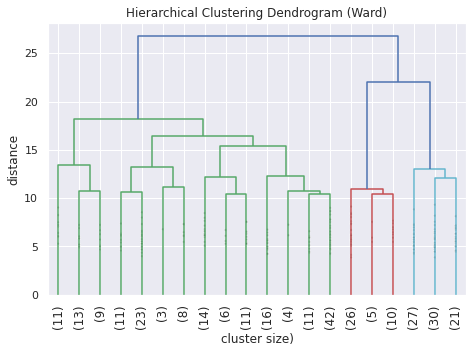

In [ ]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
for k in range(2,20):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df_float['cluster'+k]=labels

Cluster count- 2 |  db score- 4.34 |  ch score -  14.76 |  ss score -  0.04
Cluster count- 3 |  db score- 3.65 |  ch score -  12.76 |  ss score -  0.03
Cluster count- 4 |  db score- 3.7 |  ch score -  11.06 |  ss score -  0.03
Cluster count- 5 |  db score- 3.99 |  ch score -  9.93 |  ss score -  0.03
Cluster count- 6 |  db score- 3.94 |  ch score -  9.12 |  ss score -  0.02
Cluster count- 7 |  db score- 3.74 |  ch score -  8.35 |  ss score -  0.03
Cluster count- 8 |  db score- 3.52 |  ch score -  7.81 |  ss score -  0.02
Cluster count- 9 |  db score- 3.58 |  ch score -  7.39 |  ss score -  0.02
Cluster count- 10 |  db score- 3.54 |  ch score -  7.01 |  ss score -  0.0
Cluster count- 11 |  db score- 3.41 |  ch score -  6.71 |  ss score -  0.0
Cluster count- 12 |  db score- 3.35 |  ch score -  6.47 |  ss score -  0.01
Cluster count- 13 |  db score- 3.22 |  ch score -  6.22 |  ss score -  0.01
Cluster count- 14 |  db score- 3.27 |  ch score -  6.0 |  ss score -  0.01
Cluster count- 15 |  

Looking at the scores, 3 clusters might be a good cluster quantity. From 3 going forward first db score is increasing and ch decreasing. Another cluster quantity might be 14 due to a slight increase in db score.

Creat columns with n_clusters.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
df_float['cluster']=labels

In [ ]:
df_float

In [ ]:
df_float['cluster'].nunique()



... and the results for 2 clusters are!
cluster2     0     1
v7        1.41  1.41
v9        1.00  1.00
v10       1.46  1.13
v14       1.08  2.30
v56       1.86  1.70
...        ...   ...
v265      3.11  2.81
v266      2.56  2.24
v267      2.46  2.14
v268      2.36  2.13
v269      2.30  1.92

[90 rows x 2 columns]

And the size of the clusters if there are 2 clusters are
           v7   v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster2                      ...                                            
0         119  119  119  119  ...        119        119        119        119
1         182  182  182  182  ...        182        182        182        182

[2 rows x 109 columns]

And if we have 2 clusters, the dendrogram looks like


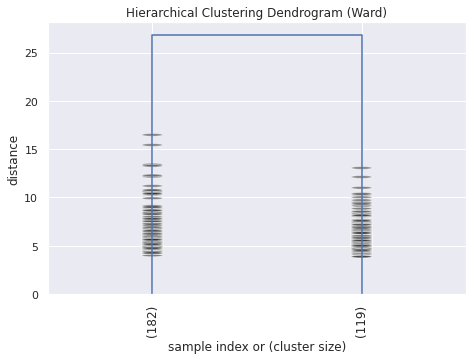



... and the results for 3 clusters are!
cluster3     0     1     2
v7        1.41  1.40  1.44
v9        1.00  1.00  1.00
v10       1.13  1.59  1.22
v14       2.30  0.60  1.98
v56       1.70  1.62  2.32
...        ...   ...   ...
v265      2.81  2.85  3.61
v266      2.24  2.22  3.22
v267      2.14  2.21  2.95
v268      2.13  2.26  2.56
v269      1.92  2.12  2.66

[90 rows x 3 columns]

And the size of the clusters if there are 3 clusters are
           v7   v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster3                      ...                                            
0         182  182  182  182  ...        182        182        182        182
1          78   78   78   78  ...         78         78         78         78
2          41   41   41   41  ...         41         41         41         41

[3 rows x 109 columns]

And if we have 3 clusters, the dendrogram looks like


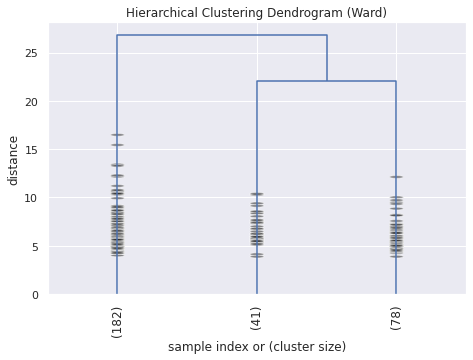



... and the results for 4 clusters are!
cluster4     0     1     2     3
v7        1.36  1.64  1.44  1.40
v9        1.00  1.00  1.00  1.00
v10       1.11  1.21  1.22  1.59
v14       2.49  1.42  1.98  0.60
v56       1.64  1.97  2.32  1.62
...        ...   ...   ...   ...
v265      2.84  2.70  3.61  2.85
v266      2.26  2.18  3.22  2.22
v267      2.13  2.18  2.95  2.21
v268      2.15  2.06  2.56  2.26
v269      1.93  1.88  2.66  2.12

[90 rows x 4 columns]

And the size of the clusters if there are 4 clusters are
           v7   v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster4                      ...                                            
0         149  149  149  149  ...        149        149        149        149
1          33   33   33   33  ...         33         33         33         33
2          41   41   41   41  ...         41         41         41         41
3          78   78   78   78  ...         78         78         78         78

[4 rows x 10

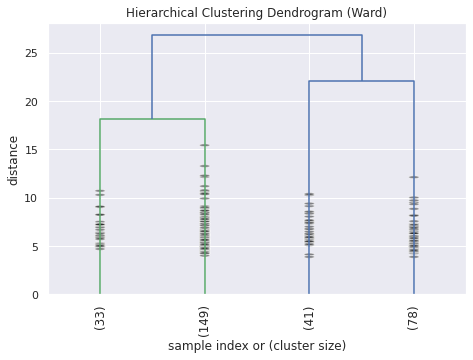



... and the results for 5 clusters are!
cluster5     0     1     2     3     4
v7        1.33  1.64  1.44  1.40  1.42
v9        1.00  1.00  1.00  1.00  1.00
v10       1.11  1.21  1.22  1.59  1.13
v14       2.38  1.42  1.98  0.60  2.76
v56       1.68  1.97  2.32  1.62  1.53
...        ...   ...   ...   ...   ...
v265      2.79  2.70  3.61  2.85  2.96
v266      2.24  2.18  3.22  2.22  2.29
v267      2.07  2.18  2.95  2.21  2.27
v268      2.00  2.06  2.56  2.26  2.49
v269      1.88  1.88  2.66  2.12  2.04

[90 rows x 5 columns]

And the size of the clusters if there are 5 clusters are
           v7   v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster5                      ...                                            
0         104  104  104  104  ...        104        104        104        104
1          33   33   33   33  ...         33         33         33         33
2          41   41   41   41  ...         41         41         41         41
3          78   78 

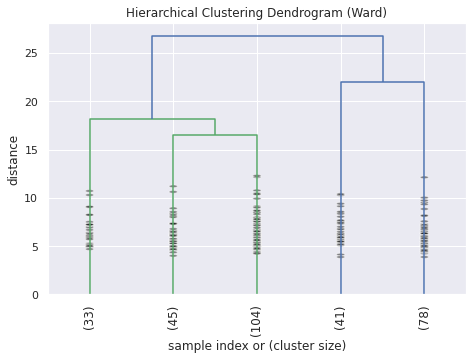



... and the results for 6 clusters are!
cluster6     0     1     2     3     4     5
v7        1.64  1.42  1.35  1.40  1.32  1.44
v9        1.00  1.00  1.00  1.00  1.00  1.00
v10       1.21  1.13  1.03  1.59  1.14  1.22
v14       1.42  2.76  3.03  0.60  2.10  1.98
v56       1.97  1.53  1.45  1.62  1.78  2.32
...        ...   ...   ...   ...   ...   ...
v265      2.70  2.96  2.77  2.85  2.79  3.61
v266      2.18  2.29  2.23  2.22  2.25  3.22
v267      2.18  2.27  2.03  2.21  2.08  2.95
v268      2.06  2.49  2.00  2.26  2.00  2.56
v269      1.88  2.04  1.90  2.12  1.86  2.66

[90 rows x 6 columns]

And the size of the clusters if there are 6 clusters are
          v7  v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster6                    ...                                            
0         33  33   33   33  ...         33         33         33         33
1         45  45   45   45  ...         45         45         45         45
2         31  31   31   31  ...  

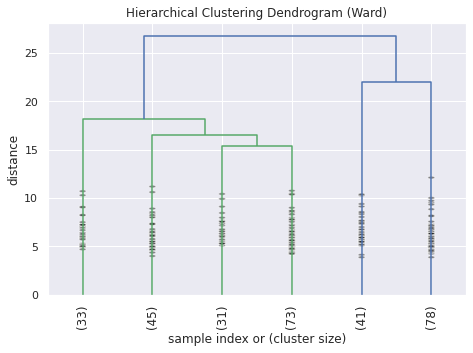



... and the results for 7 clusters are!
cluster7     0     1     2     3     4     5     6
v7        1.42  1.40  1.35  1.73  1.32  1.44  1.45
v9        1.00  1.00  1.00  1.00  1.00  1.00  1.00
v10       1.13  1.59  1.03  1.09  1.14  1.22  1.45
v14       2.76  0.60  3.03  1.82  2.10  1.98  0.64
v56       1.53  1.62  1.45  1.95  1.78  2.32  2.00
...        ...   ...   ...   ...   ...   ...   ...
v265      2.96  2.85  2.77  3.05  2.79  3.61  2.00
v266      2.29  2.22  2.23  2.50  2.25  3.22  1.55
v267      2.27  2.21  2.03  2.50  2.08  2.95  1.55
v268      2.49  2.26  2.00  2.27  2.00  2.56  1.64
v269      2.04  2.12  1.90  2.09  1.86  2.66  1.45

[90 rows x 7 columns]

And the size of the clusters if there are 7 clusters are
          v7  v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster7                    ...                                            
0         45  45   45   45  ...         45         45         45         45
1         78  78   78   78  ...      

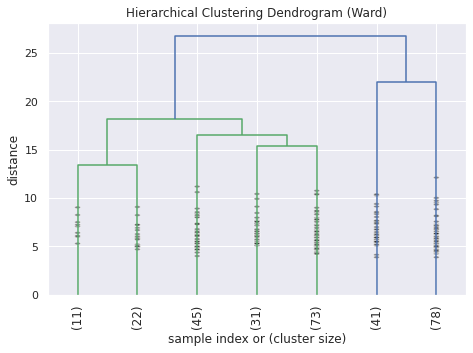



... and the results for 8 clusters are!
cluster8     0     1     2     3     4     5     6     7
v7        1.40  1.32  1.35  1.73  1.45  1.44  1.45  1.41
v9        1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
v10       1.59  1.14  1.03  1.09  1.09  1.22  1.45  1.15
v14       0.60  2.10  3.03  1.82  4.45  1.98  0.64  2.21
v56       1.62  1.78  1.45  1.95  1.45  2.32  2.00  1.56
...        ...   ...   ...   ...   ...   ...   ...   ...
v265      2.85  2.79  2.77  3.05  3.27  3.61  2.00  2.85
v266      2.22  2.25  2.23  2.50  2.45  3.22  1.55  2.24
v267      2.21  2.08  2.03  2.50  2.36  2.95  1.55  2.24
v268      2.26  2.00  2.00  2.27  2.36  2.56  1.64  2.53
v269      2.12  1.86  1.90  2.09  2.00  2.66  1.45  2.06

[90 rows x 8 columns]

And the size of the clusters if there are 8 clusters are
          v7  v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster8                    ...                                            
0         78  78   78   78  ...         7

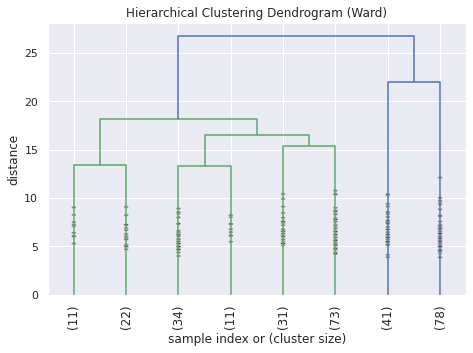



... and the results for 9 clusters are!
cluster9     0     1     2     3     4     5     6     7     8
v7        1.32  1.45  1.35  1.73  1.45  1.44  1.45  1.41  1.30
v9        1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
v10       1.14  1.55  1.03  1.09  1.09  1.22  1.45  1.15  1.67
v14       2.10  0.82  3.03  1.82  4.45  1.98  0.64  2.21  0.19
v56       1.78  1.65  1.45  1.95  1.45  2.32  2.00  1.56  1.56
...        ...   ...   ...   ...   ...   ...   ...   ...   ...
v265      2.79  3.02  2.77  3.05  3.27  3.61  2.00  2.85  2.52
v266      2.25  2.33  2.23  2.50  2.45  3.22  1.55  2.24  2.00
v267      2.08  2.35  2.03  2.50  2.36  2.95  1.55  2.24  1.93
v268      2.00  2.33  2.00  2.27  2.36  2.56  1.64  2.53  2.11
v269      1.86  2.22  1.90  2.09  2.00  2.66  1.45  2.06  1.93

[90 rows x 9 columns]

And the size of the clusters if there are 9 clusters are
          v7  v9  v10  v14  ...  cluster16  cluster17  cluster18  cluster19
cluster9                    ...              

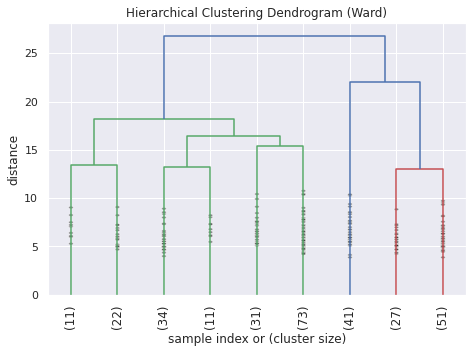



... and the results for 10 clusters are!
cluster10     0     1     2     3     4     5     6     7     8     9
v7         1.35  1.45  1.44  1.73  1.45  1.18  1.45  1.41  1.30  1.81
v9         1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
v10        1.03  1.55  1.22  1.09  1.09  1.14  1.45  1.15  1.67  1.12
v14        3.03  0.82  1.98  1.82  4.45  2.12  0.64  2.21  0.19  2.00
v56        1.45  1.65  2.32  1.95  1.45  1.74  2.00  1.56  1.56  1.94
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
v265       2.77  3.02  3.61  3.05  3.27  2.70  2.00  2.85  2.52  3.12
v266       2.23  2.33  3.22  2.50  2.45  2.28  1.55  2.24  2.00  2.12
v267       2.03  2.35  2.95  2.50  2.36  2.11  1.55  2.24  1.93  2.00
v268       2.00  2.33  2.56  2.27  2.36  1.98  1.64  2.53  2.11  2.06
v269       1.90  2.22  2.66  2.09  2.00  1.79  1.45  2.06  1.93  2.12

[90 rows x 10 columns]

And the size of the clusters if there are 10 clusters are
           v7  v9  v10  v14  ...  

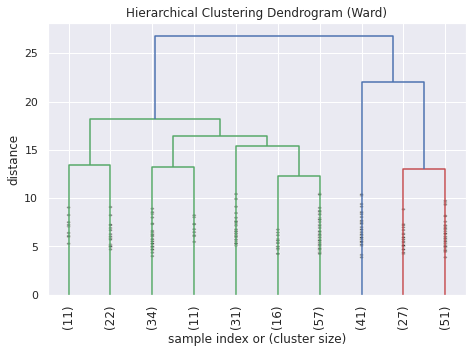

In [ ]:
for i in range(2,11):
    i=str(i)
    X_1=df_float[['cluster'+i,'v7','v9','v10','v14','v56','v57','v58','v59','v60','v61','v104','v105','v106','v107','v108','v109','v110','v111','v112','v113','v114','v115','v116','v123','v124','v125','v126','v127','v128','v129','v130','v131','v132','v133','v134','v135','v136','v137','v138','v170','v171','v172','v173','v174','v175','v176','v179','v180','v182','v188','v189','v190','v191','v192','v193','v194','v195','v196','v197','v198','v199','v200','v201','v202','v203','v220','v221','v222','v223','v224','v225','v226','v227','v228','v229','v230','v256','v257','v258','v259','v260','v261','v262','v263','v264','v265','v266','v267','v268','v269']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=df_float.groupby(['cluster'+i]).count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

Since 3 seems to be a good cluster quantity, i can look at which questions might be differentiate those clusters the most.

In [ ]:
df_float.groupby(['cluster3']).mean()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald,cluster,cluster2,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19
cluster3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.406593,1.0,1.131868,2.296703,1.697802,1.049451,1.494505,1.593407,2.412088,2.725275,1.923077,1.912088,1.664835,1.736264,1.978022,1.890110,1.807692,1.895604,1.939560,1.456044,1.895604,1.978022,1.840659,1.461538,1.175824,1.851648,1.483516,1.851648,1.846154,1.631868,1.456044,1.741758,1.835165,1.505495,1.373626,1.461538,1.362637,1.434066,1.989011,1.225275,...,1.615385,1.109890,1.912088,1.609890,1.873626,1.505495,1.879121,2.170330,2.164835,2.032967,2.708791,2.510989,1.697802,2.379121,2.346154,2.181319,2.813187,2.241758,2.137363,2.131868,1.917582,49.296703,1.17033,1.0,0.181319,1.17033,2.192308,2.67033,3.016484,2.615385,4.631868,5.593407,4.543956,4.285714,3.659341,4.346154,5.043956,6.241758,7.406593,8.543956
1,1.397436,1.0,1.589744,0.602564,1.615385,1.192308,1.564103,1.730769,2.679487,3.500000,1.974359,1.923077,1.641026,1.730769,1.948718,1.858974,1.935897,1.910256,1.974359,1.294872,1.987179,1.987179,1.871795,1.461538,1.256410,1.858974,1.589744,1.717949,1.910256,1.628205,1.333333,1.769231,1.846154,1.576923,1.435897,1.461538,1.320513,1.551282,2.000000,1.564103,...,1.500000,1.141026,1.987179,1.602564,2.000000,1.410256,1.923077,2.538462,2.423077,2.205128,2.628205,2.628205,1.897436,2.384615,2.346154,2.205128,2.846154,2.217949,2.205128,2.256410,2.115385,34.256410,3.00000,0.0,3.000000,3.00000,3.000000,1.00000,0.000000,3.423077,3.423077,2.769231,8.884615,6.576923,6.576923,6.576923,4.846154,4.846154,4.846154,4.846154
2,1.439024,1.0,1.219512,1.975610,2.317073,1.243902,1.634146,1.439024,2.926829,3.341463,1.926829,1.926829,1.634146,1.804878,1.951220,1.853659,1.731707,1.902439,1.975610,1.317073,1.951220,1.975610,1.829268,1.487805,1.219512,1.878049,1.414634,1.878049,1.951220,1.682927,1.731707,1.780488,1.829268,1.560976,1.658537,1.658537,1.390244,1.439024,2.000000,1.463415,...,1.634146,1.243902,1.878049,1.780488,2.000000,1.390244,1.756098,3.097561,2.975610,2.536585,3.097561,2.829268,2.390244,3.219512,2.975610,2.804878,3.609756,3.219512,2.951220,2.560976,2.658537,45.097561,2.00000,0.0,2.000000,2.00000,5.000000,5.00000,5.000000,5.000000,2.000000,2.000000,2.000000,0.000000,8.975610,8.975610,8.975610,8.975610,8.975610,3.804878


v14, v56, v261, v265, V266 are a few examples where differences seems to be bigger than normal. Also visible is that the second cluster are younger people (average = 34,25). for question 14 result for younger people (second cluster) is very low (therefore good). I just realized that this doesnt seem to be a value question but just asking how many children someone has (someone acually has a value of 10 there), and this makes sense that the amount is lower than in the older clusters. However, when going forward to cluster based on value sentiment, this question should have been excluded. I dont know danish, but question 266 seems to ask for the sentiment against the NATO and the third group is more critical towards NATO.